# 🏢 PROYECTO: Análisis de ventas de e-commerce multicanal

## 🎯Objetivo:

el jefe quiere saber como estan comportando las ventas en diferentes canales (web, app, sucursal), identificar los productos y clientes mas rentables, y detectar posibles mejoras

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

clientes = [f'C{i:03}' for i in range(1, 51)]
productos = ['Laptop', 'Audífonos', 'Celular', 'Mouse', 'Teclado', 'Monitor']
categorias = {
    'Laptop': 'Tecnología',
    'Audífonos': 'Accesorios',
    'Celular': 'Tecnología',
    'Mouse': 'Accesorios',
    'Teclado': 'Accesorios',
    'Monitor': 'Tecnología'
}
ciudades = ['CDMX', 'GDL', 'MTY', 'Puebla', 'Querétaro']
canales = ['Web', 'App', 'Sucursal']
pagos = ['Tarjeta', 'Efectivo', 'Transferencia']

data = []

for i in range(1, 301):  # 300 pedidos
    producto = np.random.choice(productos)
    data.append({
        'Pedido_ID': f'P{i:03}',
        'Cliente_ID': np.random.choice(clientes),
        'Fecha': pd.Timestamp('2024-01-01') + pd.to_timedelta(np.random.randint(0, 180), unit='D'),
        'Producto': producto,
        'Categoría': categorias[producto],
        'Precio': np.random.randint(500, 20000),
        'Unidades': np.random.randint(1, 5),
        'Ciudad': np.random.choice(ciudades),
        'Canal_Venta': np.random.choice(canales),
        'Método_Pago': np.random.choice(pagos)
    })

df = pd.DataFrame(data)
df['Total_Venta'] = df['Precio'] * df['Unidades']

## 🧪 Tareas principales:

1. Ventas totales por ciudad y canal
2. Top 5 productos mas vendidos por unidades y por ingresos
3. Clientes con mas compras (por cantidad y monto)
4. Análsis mensual de ventas (tendencia por mes)
5. Dashboards:
. grafico de barras : venta por canal
. pie chart : ventas por categoria
. linea de tiempo : ventas mensuales
. tabla con resumen por ciudad

## 🎯 KPIs clave a calcular:
	•	Ticket promedio por cliente
	•	Participación de canales (Web vs App vs Sucursal)
	•	Ciudad con mejor desempeño
	•	Producto estrella por ingresos
	•	Clientes VIP

### Ventas totales por ciudad y canal 📍

In [2]:
ventas_totales_por_ciudad = df.groupby('Ciudad')['Total_Venta'].sum().reset_index()
ventas_totales_por_ciudad = ventas_totales_por_ciudad.sort_values(by='Total_Venta', ascending=False)
ventas_totales_por_ciudad

,Ciudad,Total_Venta
4,Querétaro,1805651
1,GDL,1767506
2,MTY,1667774
0,CDMX,1288160
3,Puebla,1173412


In [3]:
ventas_por_canal = df.groupby('Canal_Venta')['Total_Venta'].sum().reset_index()
ventas_por_canal = ventas_por_canal.sort_values(by='Total_Venta', ascending=False)
ventas_por_canal

,Canal_Venta,Total_Venta
2,Web,2788238
1,Sucursal,2500816
0,App,2413449


In [4]:
total_canal_y_venta =  df.groupby(['Ciudad', 'Canal_Venta'])['Total_Venta'].sum().reset_index().sort_values(by='Total_Venta', ascending=False)
total_canal_y_venta

,Ciudad,Canal_Venta,Total_Venta
14,Querétaro,Web,723468
5,GDL,Web,665402
4,GDL,Sucursal,604446
8,MTY,Web,565372
6,MTY,App,562793
13,Querétaro,Sucursal,547033
7,MTY,Sucursal,539609
12,Querétaro,App,535150
3,GDL,App,497658
0,CDMX,App,469284


### Top 5 productos mas vendidos por unidades y por ingresos 📦

In [5]:
productos_mas_vendidos_por_unidades = df.groupby('Producto')['Unidades'].sum().reset_index()
productos_mas_vendidos_por_unidades = productos_mas_vendidos_por_unidades.sort_values(by='Unidades', ascending=False)
productos_mas_vendidos_por_unidades.head()

,Producto,Unidades
2,Laptop,138
4,Mouse,138
1,Celular,130
0,Audífonos,121
3,Monitor,117


In [6]:
productos_por_ingresos = df.groupby('Producto')['Total_Venta'].sum().reset_index()
productos_por_ingresos = productos_por_ingresos.sort_values(by='Total_Venta', ascending=False)
productos_por_ingresos.head()

,Producto,Total_Venta
4,Mouse,1432972
1,Celular,1350682
2,Laptop,1327434
0,Audífonos,1255141
5,Teclado,1187118


### Clientes con mas compras (por cantidad y monto) 👤

In [7]:
clientes_mas_frecuentes = df['Cliente_ID'].value_counts().reset_index()
clientes_mas_frecuentes.columns = ['Cliente_ID', 'Frecuencia']
clientes_mas_frecuentes = clientes_mas_frecuentes.sort_values(by='Frecuencia', ascending=False)
clientes_mas_frecuentes.head()

,Cliente_ID,Frecuencia
0,C047,10
2,C033,9
3,C046,9
4,C020,9
5,C032,9


In [8]:
clientes_por_cantidad = df.groupby('Cliente_ID')['Unidades'].sum().reset_index()
clientes_por_cantidad = clientes_por_cantidad.sort_values(by='Unidades', ascending=False)
clientes_por_cantidad.head()

,Cliente_ID,Unidades
46,C047,31
17,C018,23
43,C044,23
31,C032,22
4,C005,22


In [9]:
clentes_por_monto = df.groupby('Cliente_ID')['Total_Venta'].sum().reset_index()
clentes_por_monto = clentes_por_monto.sort_values(by='Total_Venta', ascending=False)
clentes_por_monto.head()

,Cliente_ID,Total_Venta
43,C044,350884
46,C047,314729
4,C005,290842
17,C018,275318
6,C007,241409


In [10]:
ticket_promedio_por_cliente = df.groupby('Cliente_ID')['Total_Venta'].mean().reset_index()
ticket_promedio_por_cliente['Total_Venta'].mean()

np.float64(25821.941587301586)

### Analisis mensual de ventas (tendencia por mes)🕒

In [11]:
analisis_mensual = df.groupby(df['Fecha'].dt.to_period('M')).agg({
    'Total_Venta': 'sum',
    'Unidades': 'sum',
    'Pedido_ID': 'count'
}).reset_index()
analisis_mensual['Fecha'] = analisis_mensual['Fecha'].dt.to_timestamp()
analisis_mensual = analisis_mensual.sort_values(by='Fecha')
analisis_mensual

,Fecha,Total_Venta,Unidades,Pedido_ID
0,2024-01-01,1214954,109,51
1,2024-02-01,1460068,132,50
2,2024-03-01,1423481,138,57
3,2024-04-01,1095133,114,49
4,2024-05-01,1319601,125,44
5,2024-06-01,1189266,126,49


## DASHBOARDS 📊

#### venta po canal

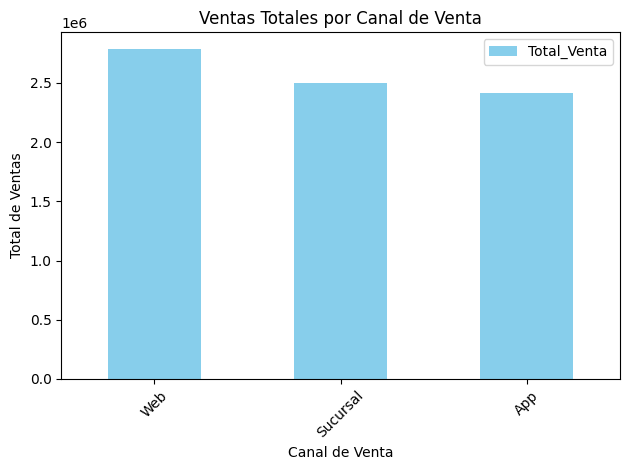

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()        

ventas_por_canal.plot(kind='bar', x='Canal_Venta', y='Total_Venta', ax=ax, color='skyblue')
ax.set_title('Ventas Totales por Canal de Venta')
ax.set_ylabel('Total de Ventas')
ax.set_xlabel('Canal de Venta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ventas por categoria

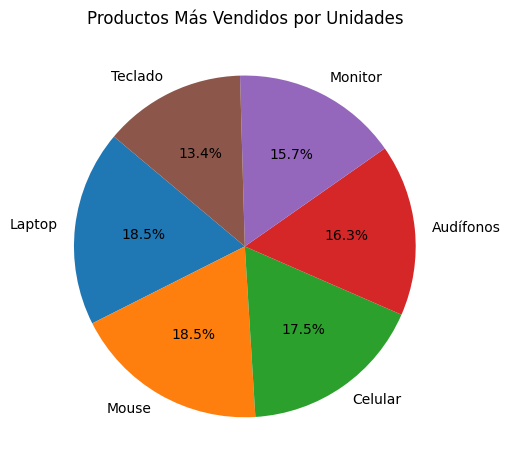

In [13]:
fig, ax = plt.subplots()
ax.pie(productos_mas_vendidos_por_unidades['Unidades'],
       labels=productos_mas_vendidos_por_unidades['Producto'],
       autopct='%1.1f%%', startangle=140)
ax.set_title('Productos Más Vendidos por Unidades')
plt.tight_layout()
plt.show()

### Ventas mensuales

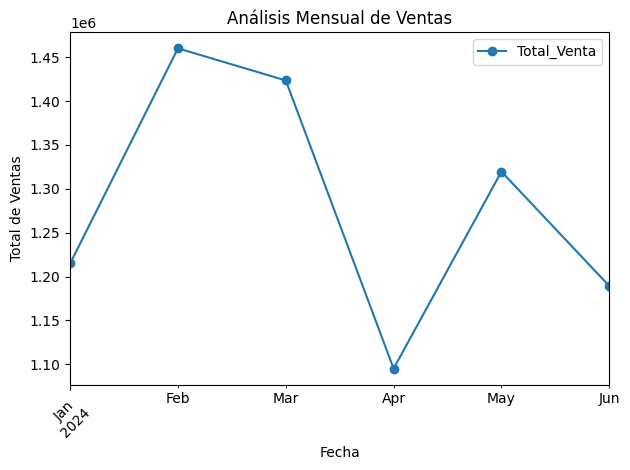

In [14]:
fig, ax = plt.subplots()
analisis_mensual.plot(kind='line', x='Fecha', y='Total_Venta', ax=ax, marker='o')
ax.set_title('Análisis Mensual de Ventas')
ax.set_ylabel('Total de Ventas')
ax.set_xlabel('Fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# KPI's 🎯

#### El ticket promedio por cliente es de 25821.94

#### La participacion de canales va de siguiente manera
1. WEB
2. SUCURSAL 
3. APP 

#### La ciudad con mejor desempeño es QUERETARO

#### Nuestro producto estrella es el mouse

#### Nuestros primeros 5 clientes VIP son 
1. C047
2. C033
3. C046
4. C020
5. C032

#### Hay 38 clientes que son de fidelizacion